# Подключение библиотек

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_friedman2
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Объявление данных

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_parquet(r'data11.parquet')
X = data.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis = 1).values
y = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение к данным OneHotEncoding

In [5]:
one_hot_data = pd.get_dummies(data, columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], prefix='OHE')

# Выборка данных для обучения модели

In [6]:
X = one_hot_data.values
y = one_hot_data['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели

In [7]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Обучение модели

In [8]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Делаем предсказания на тестовом наборе

In [9]:
y_pred = xgb.predict(X_test)

# Оцениваем модель

In [10]:
mse = mean_squared_error(y_test, y_pred)

# Выводим среднеквадратичную ошибку и первые пять предсказаний

In [39]:
print(f"Среднеквадратичная ошибка: {mse}")
print(f"Первые 5 предсказаний: {', '.join(map(str, y_pred[:5]))}")

Среднеквадратичная ошибка: 0.3681529462337494
Первые 5 предсказаний: 97.7149, 96.183914, 105.881516, 79.47027, 108.6483


# Вывод R²

In [40]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2*100} %") 

R²: 99.76347376533138 %


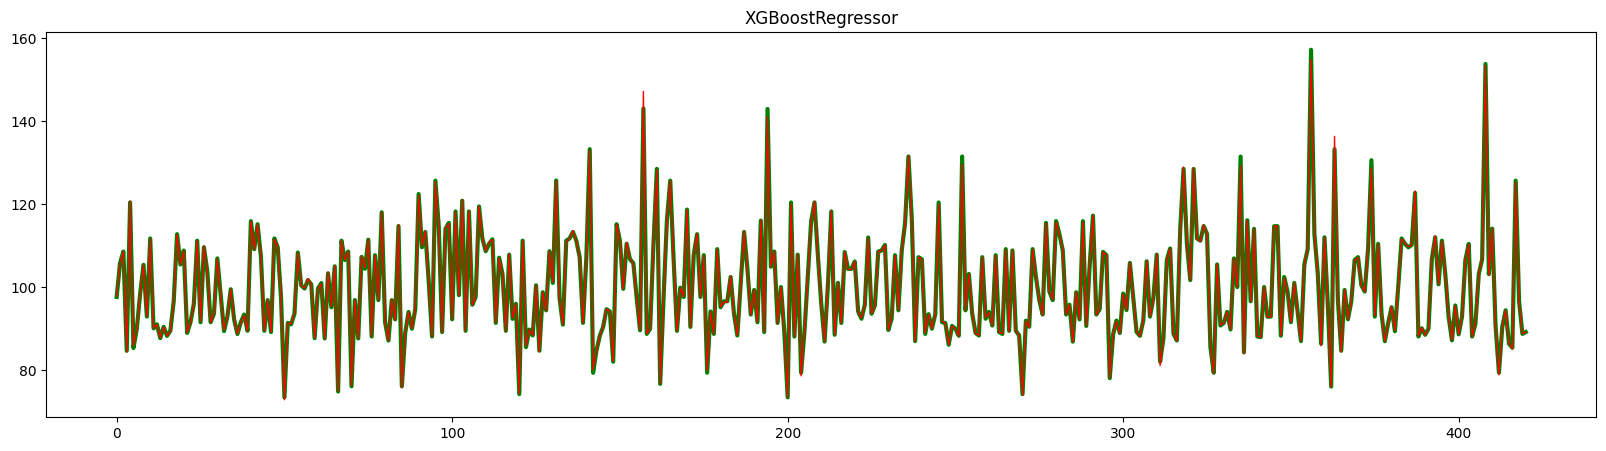

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred[::2], color="green", linewidth=3)
plt.plot(y_test[::2], color="red", linewidth=1)
plt.title('XGBoostRegressor')
plt.show()